# Medical insurance prediction (non-parametric regression)

## Run the following 3 cells EVERY fresh run (on google colab)

In [546]:
!mkdir ~/.kaggle
import json 

In [751]:
json_string = {"username":"prathyushholla","key":"86a9a298c13e760169c7fab83af60028"}

with open("kaggle.json","w") as f:
    json.dump(json_string,f)
    
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 root/.kaggle/kaggle.json
!kaggle datasets download -d mirichoi0218/insurance

In [752]:
!python3 -m zipfile -e insurance.zip /unpacked/

# Data

In [5]:
#Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [681]:
#Run this on google colab

insurance_data = pd.read_csv('/unpacked/insurance.csv')
insurance_data

In [6]:
# insurance_data = pd.read_csv('insurance.csv')
# insurance_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [757]:
insurance_data.shape

(1338, 7)

In [759]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [760]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/var/folders/lt/3lzcpht91qn8hty1345mtvnw0000gn/T/ipykernel_60162/672042706.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


<Axes: xlabel='age', ylabel='Density'>

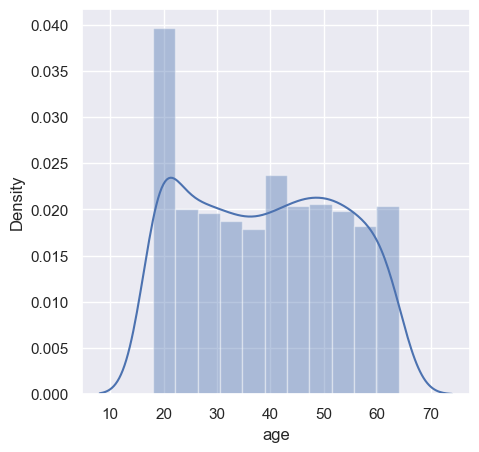

In [761]:
# Visualizing distribution of age 
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['age'])

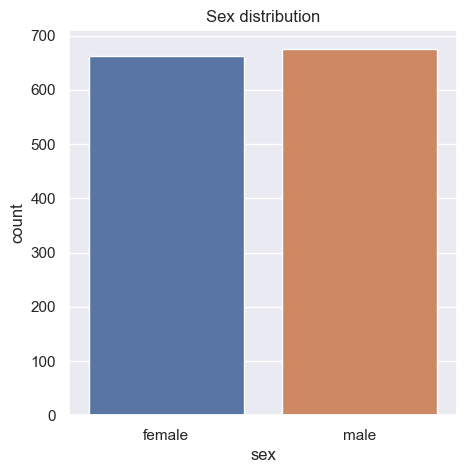


 sex
male      676
female    662
Name: count, dtype: int64


In [762]:
# Gender distribution 
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex distribution')
plt.show()
print("\n",insurance_data['sex'].value_counts())

/var/folders/lt/3lzcpht91qn8hty1345mtvnw0000gn/T/ipykernel_60162/2106275789.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


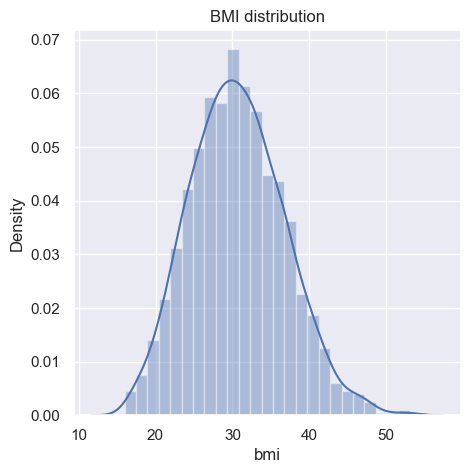

In [763]:
# BMI distribution 
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['bmi'])
plt.title('BMI distribution')
plt.show()

# Normal range of values for BMI: 18.5 to 24.9

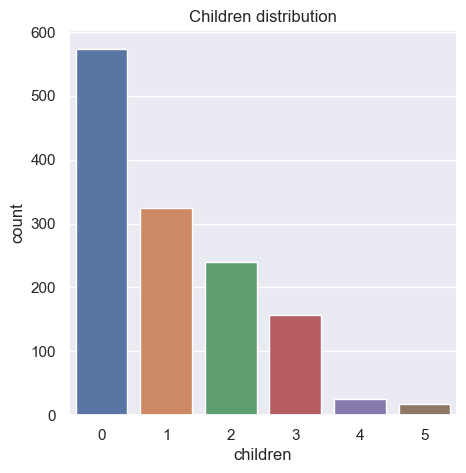


 children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [764]:
#Number of children count
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=insurance_data)
plt.title('Children distribution')
plt.show()
print("\n",insurance_data['children'].value_counts())

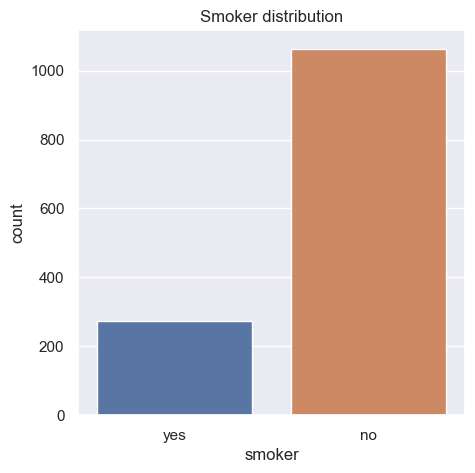


 smoker
no     1064
yes     274
Name: count, dtype: int64


In [765]:
#Smoker count 
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker distribution')
plt.show()
print("\n",insurance_data['smoker'].value_counts())

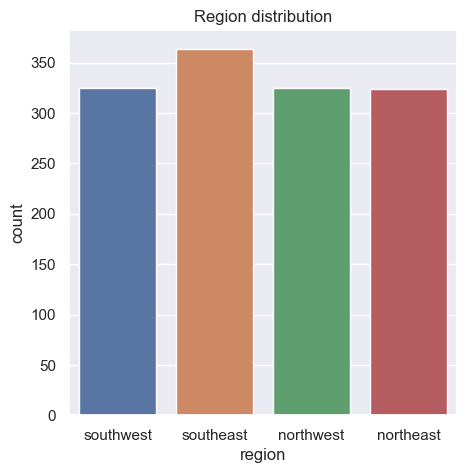


 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [766]:
# Region count
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance_data)
plt.title('Region distribution')
plt.show()
print("\n",insurance_data['region'].value_counts())

/var/folders/lt/3lzcpht91qn8hty1345mtvnw0000gn/T/ipykernel_60162/3300293629.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


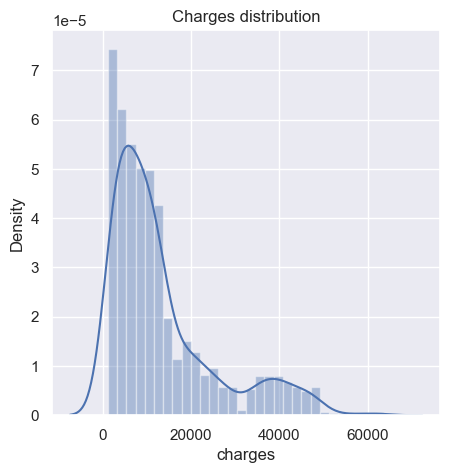

In [767]:
#Charges distribution 
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['charges'])
plt.title('Charges distribution')
plt.show()

# Data pre-processing

## Encoding features

In [7]:
# Encoding the sex column
insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace=True) # male = 0, female = 1

# Encoding the smoker column 
insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True) # smoker = 0, not a smoker = 1

# Encoding the region column 
insurance_data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True) #southeast=0, southwest=1, northeast=2, northwest=3

In [5]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [774]:
from mpl_toolkits.mplot3d import Axes3D 

In [775]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

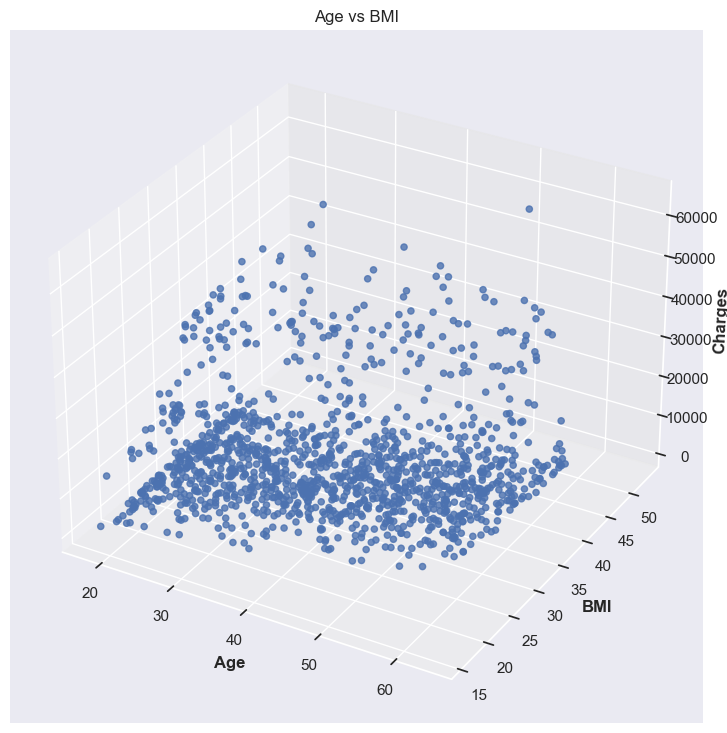

In [776]:
x = insurance_data['age']
y = insurance_data['bmi']
z = insurance_data['charges']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Creating plot
sctt = ax.scatter3D(x, y, z, alpha = 0.8)
 
plt.title("Age vs BMI")
ax.set_xlabel('Age', fontweight ='bold') 
ax.set_ylabel('BMI', fontweight ='bold') 
ax.set_zlabel('Charges', fontweight ='bold')
 
# show plot
plt.show()

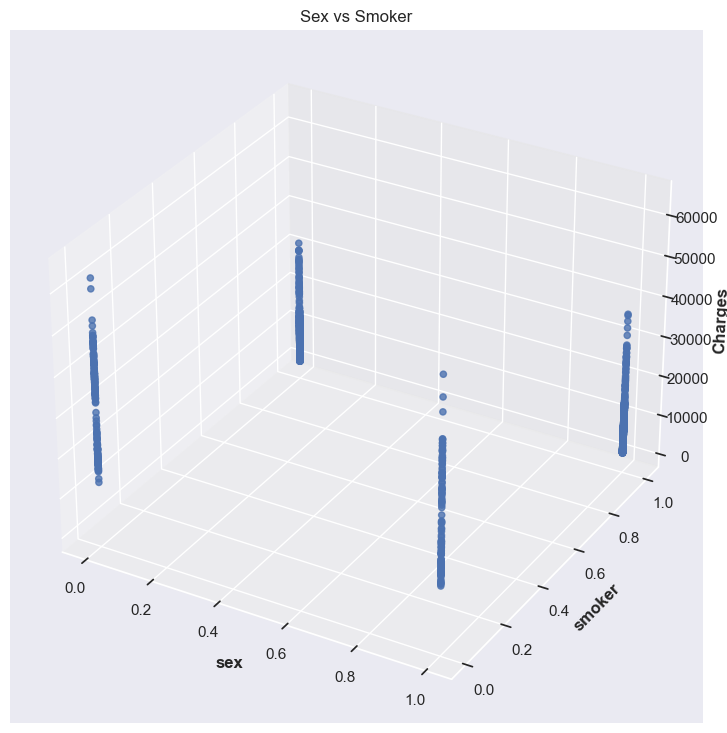

In [777]:
x = insurance_data['sex']
y = insurance_data['smoker']
z = insurance_data['charges']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Creating plot
sctt = ax.scatter3D(x, y, z, alpha = 0.8)
 
plt.title("Sex vs Smoker")
ax.set_xlabel('sex', fontweight ='bold') 
ax.set_ylabel('smoker', fontweight ='bold') 
ax.set_zlabel('Charges', fontweight ='bold')
 
# show plot
plt.show()

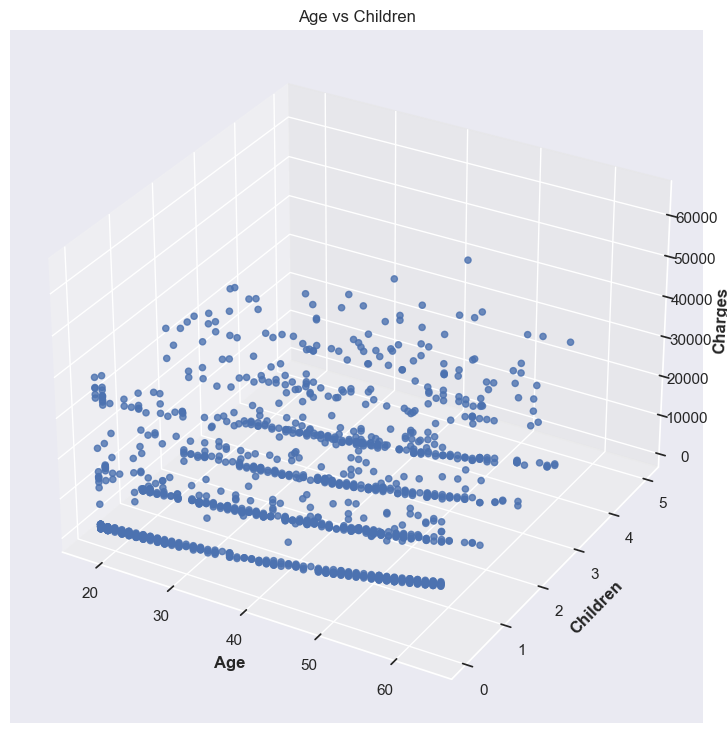

In [778]:
x = insurance_data['age']
y = insurance_data['children']
z = insurance_data['charges']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Creating plot
sctt = ax.scatter3D(x, y, z, alpha = 0.8)
 
plt.title("Age vs Children")
ax.set_xlabel('Age', fontweight ='bold') 
ax.set_ylabel('Children', fontweight ='bold') 
ax.set_zlabel('Charges', fontweight ='bold')
 
# show plot
plt.show()

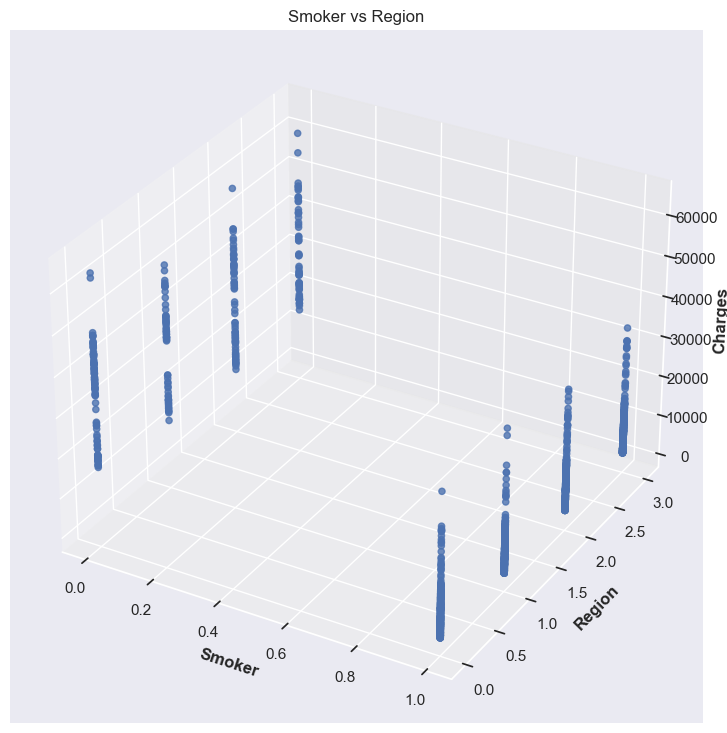

In [779]:
x = insurance_data['smoker']
y = insurance_data['region']
z = insurance_data['charges']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Creating plot
sctt = ax.scatter3D(x, y, z, alpha = 0.8)
 
plt.title("Smoker vs Region")
ax.set_xlabel('Smoker', fontweight ='bold') 
ax.set_ylabel('Region', fontweight ='bold') 
ax.set_zlabel('Charges', fontweight ='bold')
 
# show plot
plt.show()

# Feature set and Target set 

In [8]:
X = insurance_data.drop(columns='charges', axis=1) #Feature set 

y = insurance_data['charges'] #Target set 

In [9]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [10]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into training and testing data 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [13]:
print("Training data: ",X_train.shape,"\nTesting data: ",X_test.shape)

Training data:  (1070, 6) 
Testing data:  (268, 6)


In [14]:
m , n = X.shape

# Model Implementation - KNN Regression

In [15]:
#Calculates euclidean distance 

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance

In [16]:
#Implementation of K Nearest Neighbours - regression

class knn_regression():
    def __init__(self, k,mu_y,sigma_y):
        self.k = k # number of neighbouring nodes 
        self.mu_y = mu_y # mean of y_train 
        self.sigma_y = sigma_y # deviation of y_train
    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y 
        self.m, self.n = X_train.shape #m: no of rows and n: no of columns of X_train
        
    def predict(self, X_test):
        self.X_test = X_test 
        self.m_test, self.n = X_test.shape #m: no of rows and n: no of columns of X_test
        
        predictions = np.zeros( self.m_test ) # initializing array of predictions with 0s
        
        for i in range(self.m_test):            
            x = self.X_test[i] 
            neighbours = np.zeros(self.k) #initializing neighbours to 0
            neighbours = self.find_neighbors(x) # find the closest k neighbours
            predictions[i] = np.mean(neighbours) # finds the mean of the k nearest neighbours 
            
        return predictions 
    
    def find_neighbors(self,x):

        euclidean_distances = np.zeros(self.m) # initializes the array containing distances
        
        for i in range(self.m) : 
            d = euclidean_distance(x,self.X_train[i]) #calculates distance
            euclidean_distances[i] = d #assigns to the ith element of the array 
        
        k_indices = np.argsort(euclidean_distances)[:self.k] # gets the first k indices of the array in ascending order
        k_nearest_distances = [self.y_train[i]*sigma_y+mu_y for i in k_indices] #normalizes the output and stores in the array 
        
        return k_nearest_distances

### Normalization of features 

In [17]:
# Finding the mean and deviation of X_train

mu_x = np.mean(X_train,0)
sigma_x = np.std(X_train,0)

# Finding the mean and deviation of y_train 
mu_y = np.mean(y_train,0)
sigma_y = np.std(y_train,0) 

In [18]:
# Z-score normalization of features 

#X_train and X_test
X_train = (X_train - mu_x) / sigma_x 
X_test = (X_test - mu_x) / sigma_x 

#y_train 
y_train = (y_train - mu_y) / sigma_y

In [20]:
X_train

,age,sex,bmi,children,smoker,region
1153,-0.327687,1.003745,0.830921,-0.086515,0.495615,1.371478
1100,-0.469154,1.003745,-1.931945,0.740013,-2.017694,0.488517
661,1.228447,1.003745,-1.124732,-0.086515,0.495615,-1.277405
147,0.804047,1.003745,1.147361,-0.086515,0.495615,-1.277405
534,1.723581,-0.996269,1.601780,-0.913043,0.495615,-1.277405
...,...,...,...,...,...,...
1198,0.025980,-0.996269,-0.236550,-0.086515,0.495615,1.371478
837,1.157714,1.003745,-0.409229,-0.913043,0.495615,0.488517
1144,0.733313,-0.996269,0.250091,0.740013,0.495615,-0.394444
275,0.521113,1.003745,-0.691795,0.740013,0.495615,0.488517


In [791]:
#Converting data frames to numpy arrays --- NORMALIZED
X_train_np = X_train.to_numpy() 
y_train_np = y_train.to_numpy()

#Converting data frame to numpy array  
X_test_np = X_test.to_numpy()

### Plotting k values vs root mean squared error

In [792]:
# Calculating root mean square error 
def rmse(y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred)**2))

In [793]:
rmse_list = [] 
k = [i for i in range(1,50)]

In [794]:
for i in k:
    knn_r = knn_regression(i,mu_y,sigma_y)
    knn_r.fit(X_train_np, y_train_np)
    preds = knn_r.predict(X_test_np)
    err = rmse(y_test,preds)
    rmse_list.append(err)

Text(0.5, 1.0, 'k vs RMSE')

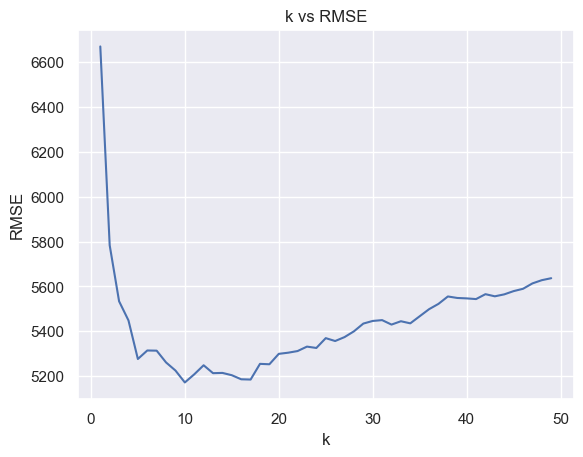

In [795]:
plt.plot(k,rmse_list)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('k vs RMSE')

### Plotting k values vs r2-score

In [796]:
from sklearn.metrics import r2_score

In [797]:
r2_list = [] 

In [798]:
for i in k:
    knn_r2 = knn_regression(i,mu_y,sigma_y)
    knn_r2.fit(X_train_np, y_train_np)
    preds = knn_r2.predict(X_test_np)
    err = r2_score(y_test,preds)
    r2_list.append(err)

Text(0.5, 1.0, 'k vs r2-score')

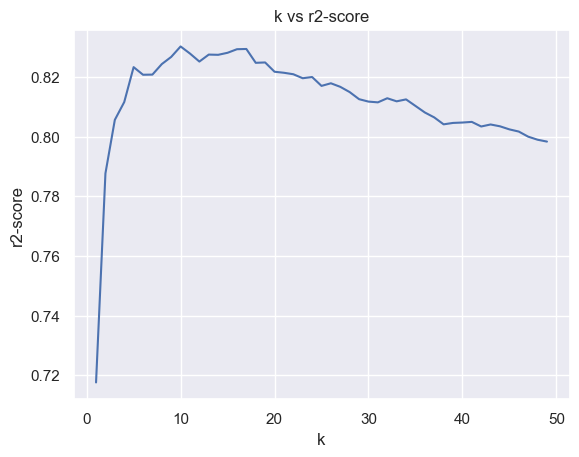

In [799]:
plt.plot(k,r2_list)
plt.xlabel('k')
plt.ylabel('r2-score')
plt.title('k vs r2-score')

## Using KNN regressor to classify y_test

In [800]:
knn_reg = knn_regression(10,mu_y,sigma_y) #initialize an object of knn_regression 
                                         
#Fitting the model 
knn_reg.fit(X_train_np,y_train_np)

#Predicting values of X_test
y_pred_knn = knn_reg.predict(X_test_np) 

## Model Evaluation

### Score of implemented KNN regressor 

In [801]:
from sklearn.metrics import r2_score

print('R-squared score of implemented KNN regression: ',r2_score(y_test, y_pred_knn))

R-squared score of implemented KNN regression:  0.8302211220256777


### Score of KNN regressor from sklearn 

In [802]:
from sklearn.neighbors import KNeighborsRegressor 

clf = KNeighborsRegressor(n_neighbors=10)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [803]:
y_pred_sk = clf.predict(X_test) * sigma_y + mu_y #predicting values of X_test using sklearn

print("R-squared score of sklearn's KNN regression: ",r2_score(y_test, y_pred_sk))

R-squared score of sklearn's KNN regression:  0.8302211220256777


### Plotting first ten actual values to predicted values 

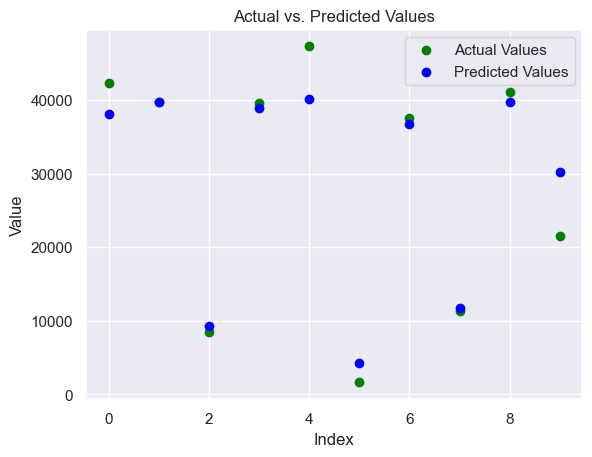

In [804]:
import matplotlib.pyplot as plt

y_actual = y_test[:10]
y_pred = y_pred_knn[:10]

# Create the scatter plot
plt.scatter(range(len(y_actual)), y_actual, label="Actual Values", color='green')  # Green for actuals
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Values", color='blue')  # Blue for predictions

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")

plt.legend()

plt.show()

### Plotting random ten actual values to predicted values 

In [805]:
import random 

def generate_rand(lower,upper,n):
    rand = []
    for i in range(n):
        x = random.randint(lower,upper)
        rand.append(x)
    return rand

In [806]:
y_pred_rand = []
y_test_rand = []

rand = generate_rand(0,len(y_test),10)

In [807]:
y_test_np = y_test.to_numpy()
for i in range(len(rand)):
    y_pred_rand.append(y_pred_knn[rand[i]])
    y_test_rand.append(y_test_np[rand[i]])

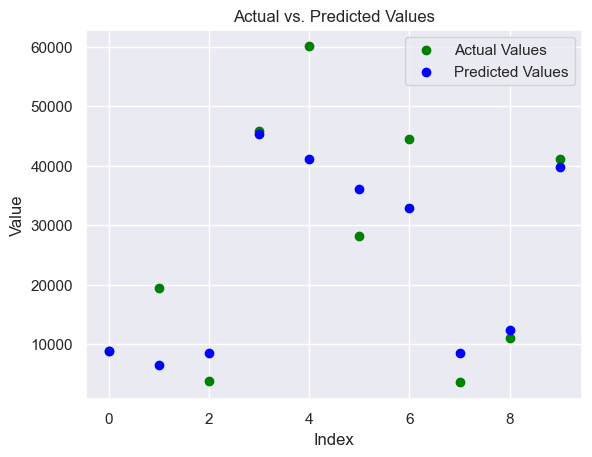

In [808]:
y_actual = y_test_rand
y_pred = y_pred_rand

# Create the scatter plot
plt.scatter(range(len(y_actual)), y_actual, label="Actual Values", color='green')  # Green for actuals
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Values", color='blue')  # Blue for predictions

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")

plt.legend()

plt.show()